## Alexander's Test Script

In [18]:
from model import *
import csv
import pandas as pd

In [3]:
incomes = []
counts = []

# TODO : Use pandas from CSV ?
with open('incomes.csv') as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        incomes.append([int(row[0]) * 1000 / 12, int(row[1]) * 1000 / 12])
        counts.append(int(row[2]))

cum_counts = []
for i in range(len(counts)):
    cum_counts.append(sum(counts[:i + 1]))

hhld_count = sum(counts)

cum_ratios = [x / hhld_count for x in cum_counts]


In [20]:
incomes = pd.DataFrame(incomes)
incomes.describe()

,0,1
count,70.000000,70.000000
mean,5750.000000,5916.666667
std,3391.847525,3391.847525
min,0.000000,166.666667
25%,2875.000000,3041.666667
50%,5750.000000,5916.666667
75%,8625.000000,8791.666667
max,11500.000000,11666.666667


------------------------------------------------------------------------------------------------------------------------------
## Run Model with given Incomes & Cumulative Ratios

In [ ]:
model = HousingMarket(rental_cost=2000, incomes=incomes, income_distr=cum_ratios)
model.run_model(20000)
data = model.datacollector
data

In [9]:
mv = data.get_model_vars_dataframe()    # mv : 'model variables'

------------------------------------------------------------------------------------------------------------------------------
## Plotting Model Parameters

Index(['Overall Savings', 'Gini', 'Mean Income'], dtype='object')

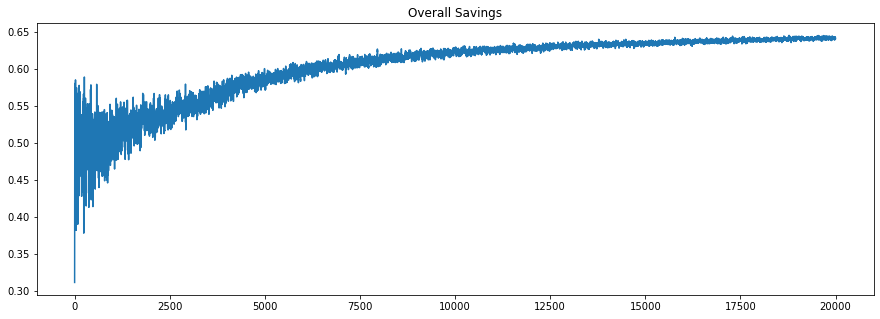

In [13]:
mv.Gini.plot(figsize=(15,5), title='Overall Savings')
mv.columns

<AxesSubplot:title={'center':'Overall Savings'}>

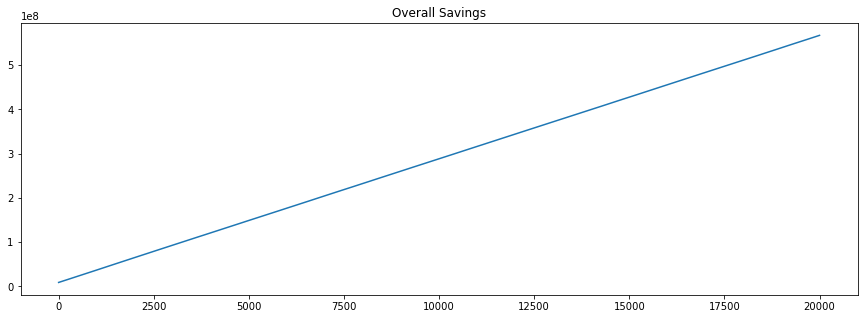

In [14]:
mv['Overall Savings'].plot(figsize=(15,5), title='Overall Savings')

<AxesSubplot:title={'center':'Mean Income'}>

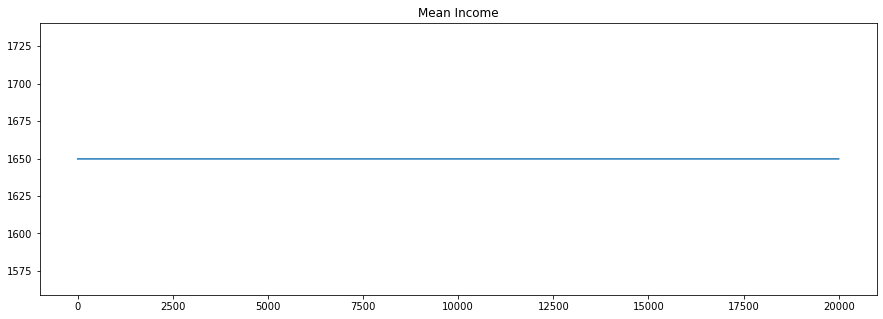

In [15]:
mv['Mean Income'].plot(figsize=(15, 5), title='Mean Income')